In [1]:
import ecfxa
from matplotlib import pyplot as plt

plt.style.use("Solarize_Light2")

# ECFs for XMM-Newton and comparison with 4XMM adopted values

In [2]:
ecf_4xmm = {
    "EPN": {
        # thin / medium / thick
        "1": [9.52, 8.37, 5.11],  # 0.2-0.5 keV
        "2": [8.12, 7.87, 6.05],  # 0.5-1.0 keV 
        "3": [5.87, 5.77, 4.99],  # 1.0-2.0 keV 
        "4": [1.95, 1.93, 1.83],  # 2.0-4.5 keV 
        "5": [0.58, 0.58, 0.57],  # 4.5-12.0 keV 
        "6": [7.39, 7.01, 5.41],  # 0.2-2.0 keV
        "7": [1.11, 1.10, 1.06],  # 2.0-12.0 keV 
        "8": [3.32, 3.19, 2.59],  # 0.2-12.0 keV
        "9": [4.56, 4.46, 3.76],  # 0.5-4.5 keV
    },
    "EMOS1": {
        "1": [1.73, 1.53, 1.00],
        "2": [1.75, 1.70, 1.38],
        "3": [2.04, 2.01, 1.79],
        "4": [0.74, 0.73, 0.70],
        "5": [0.15, 0.15, 0.14],
        "6": [1.93, 1.85, 1.53],
        "7": [0.38, 0.38, 0.37],
        "8": [0.93, 0.90, 0.78],        
        "9": [1.38, 1.36, 1.20],
    },
    "EMOS2": {
        "1": [1.73, 1.52, 0.99],
        "2": [1.76, 1.71, 1.39],
        "3": [2.04, 2.01, 1.79],
        "4": [0.74, 0.73, 0.70],
        "5": [0.15, 0.15, 0.15],
        "6": [1.93, 1.85, 1.53],
        "7": [0.39, 0.39, 0.37],
        "8": [0.94, 0.91, 0.78],        
        "9": [1.39, 1.36, 1.21],
    }
}
filters = ("Thin", "Medium", "Thick")

In [3]:
myecfs = {}
for det, ebands in ecf_4xmm.items():
    myecfs[det] = {}
    
    for eband, values in ebands.items():
        myecfs[det][eband] = [0, 0, 0]
        
        for i, filter in enumerate(ecfxa.XMMEPIC.filters):
            ecf = ecfxa.XMMEPIC(det, filter, eband=eband)
            myecfs[det][eband][i] = ecf(3e20, 1.7).value / 1e11

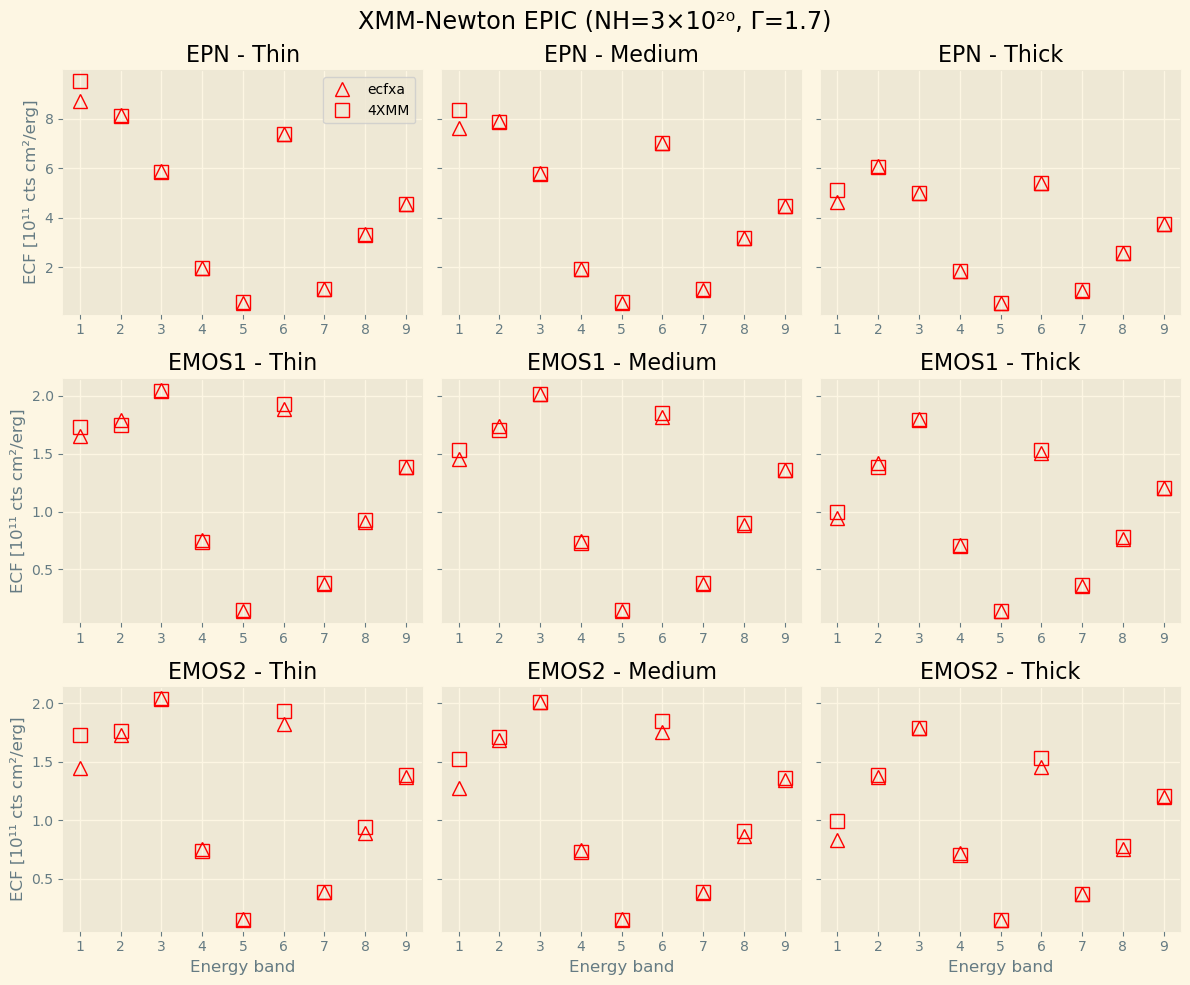

In [4]:
fig, axes = plt.subplots(3, 3, figsize=(12,10), sharey="row")
fig.suptitle("XMM-Newton EPIC (NH=3×10²⁰, Γ=1.7)", fontsize="xx-large")

for i, (det, ebands) in enumerate(ecf_4xmm.items()):
    for eband in ebands:
        if eband == "1":
            label1 = "ecfxa"
            label2 = "4XMM"
        else:
            label1 = "_ecfxa"
            label2 = "_4XMM"

        for j, filter in enumerate(filters):
            axes[i, j].set_title(f"{det} - {filter}")
            axes[i, j].plot(eband, myecfs[det][eband][j], "r^", ms=10, markerfacecolor="none", label=label1)
            axes[i, j].plot(eband, ecf_4xmm[det][eband][j], "rs", ms=10, markerfacecolor="none", label=label2)
            
            if i == 2:
                axes[i, j].set_xlabel("Energy band")

            if j == 0:
                axes[i, j].set_ylabel("ECF [10¹¹ cts cm²/erg]")
        
axes[0, 0].legend()
    
plt.tight_layout()
plt.show()

# Swift-XRT ECFs for two different epochs

In [5]:
myecfs_2005, myecfs_2024 = {}, {}
for mode, mode_grades in ecfxa.SwiftXRT.grades.items():
    myecfs_2005[mode] = {}
    myecfs_2024[mode] = {}

    for eband in ecfxa.SwiftXRT.ebands:
        myecfs_2005[mode][eband] = []
        myecfs_2024[mode][eband] = []

        for grade in mode_grades:
            ecf = ecfxa.SwiftXRT(mode, grade, eband, date="2005-01-01")
            myecfs_2005[mode][eband].append(ecf(3e20, 1.7).value / 1e11)

            ecf = ecfxa.SwiftXRT(mode, grade, eband, date="2024-01-01")
            myecfs_2024[mode][eband].append(ecf(3e20, 1.7).value / 1e11)

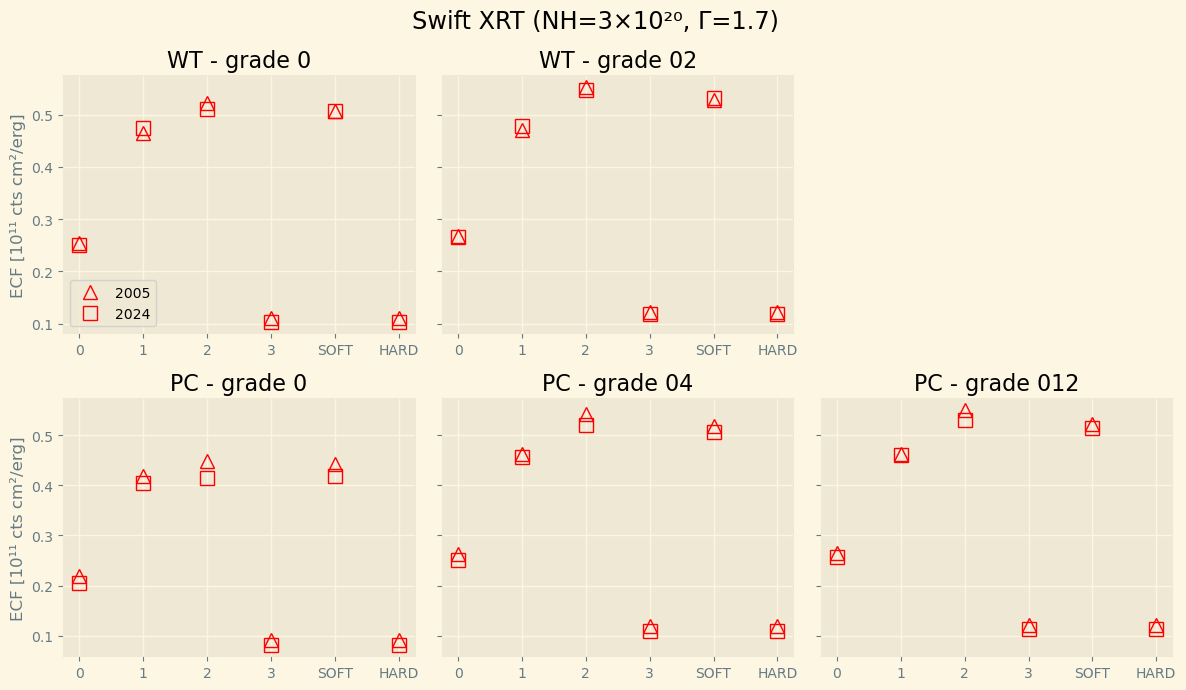

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(12,7), sharey="row")
fig.suptitle("Swift XRT (NH=3×10²⁰, Γ=1.7)", fontsize="xx-large")

for i, (mode, eband_ecfs) in enumerate(myecfs_2005.items()):
    for eband, grade_ecfs in eband_ecfs.items():
        if eband == "1":
            label1 = "2005"
            label2 = "2024"
        else:
            label1 = "_2005"
            label2 = "_2024"

        for j, ecf in enumerate(grade_ecfs):
            axes[i, j].set_title(f"{mode.upper()} - grade {ecfxa.SwiftXRT.grades[mode][j]}")
            axes[i, j].plot(eband, ecf, "r^", ms=10, markerfacecolor="none", label=label1)
            axes[i, j].plot(eband, myecfs_2024[mode][eband][j], "rs", ms=10, markerfacecolor="none", label=label2)

            if i == 2:
                axes[i, j].set_xlabel("Energy band")

            if j == 0:
                axes[i, j].set_ylabel("ECF [10¹¹ cts cm²/erg]")

axes[0, 0].legend(loc="lower left")
axes[0, 2].set_axis_off()

plt.tight_layout()
plt.show()

# eROSITA ECFs and comparison with adopted values for the eROSITA upper limit server

In [7]:
# tbabs * po (NH=3e20, Γ=2.0/1.7), from Tubin-Arenas+2024
ecf_erass = {
    "1": (10.74, 10.60),
    "021": (10.26, 10.56),
    "022": (10.87, 10.54),
    "023": (1.147, 1.127),
    "02e": (7.932, 6.982),
}

In [8]:
myecfs = {}
for eband, ecf_values in ecf_erass.items():
    ecf = ecfxa.eROSITA(eband=eband)
    
    myecfs[eband] = [
        ecf(3e20, 2.0).value / 1e11,
        ecf(3e20, 1.7).value / 1e11,
    ]

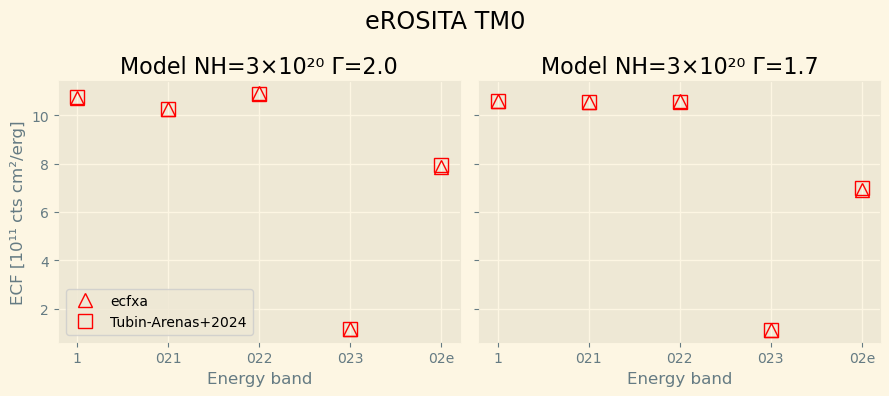

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(9,4), sharey="row")
fig.suptitle("eROSITA TM0", fontsize="xx-large")

for i in range(2):
    ebands = myecfs.keys()
    model_ecfs = [values[i] for values in myecfs.values()]
    axes[i].plot(ebands, model_ecfs, "r^", ms=10, markerfacecolor="none", label="ecfxa")
    
    ebands = ecf_erass.keys()
    model_ecfs = [values[i] for values in ecf_erass.values()]
    axes[i].plot(ebands, model_ecfs, "rs", ms=10, markerfacecolor="none", label="Tubin-Arenas+2024")

    axes[i].set_xlabel("Energy band")

axes[0].set_title("Model NH=3×10²⁰ Γ=2.0")
axes[0].set_ylabel("ECF [10¹¹ cts cm²/erg]")
axes[0].legend()

axes[1].set_title("Model NH=3×10²⁰ Γ=1.7")
    
plt.tight_layout()
plt.show()